<h1>Filosofia de trabajo</h1>

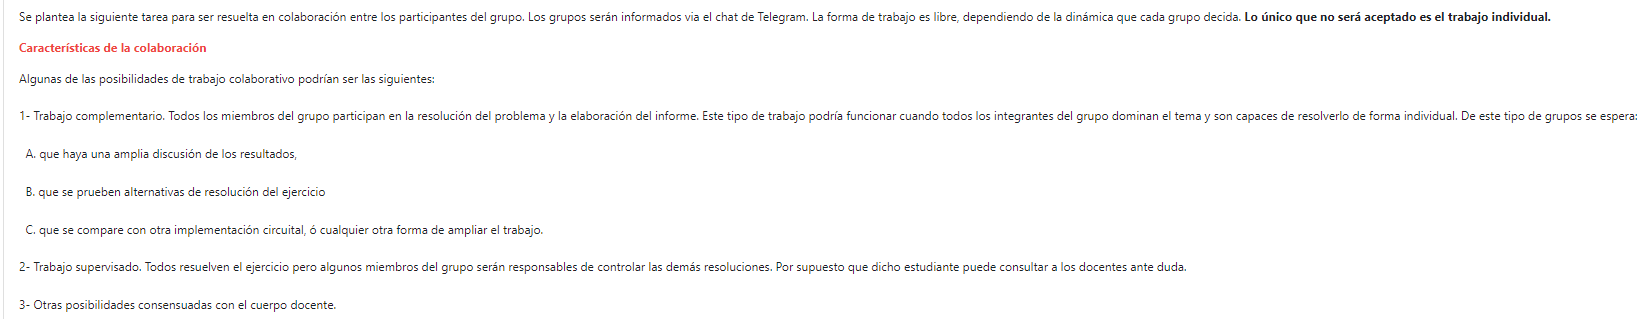

La caracteristica de colaboracion adoptada fue la de "trabajo supervisado", en la que los estudiantes resolvieron el ejercicio planteado en forma individual y corroboraron haber llegado a los mismo resultados.
A su vez se aplico una filosofia "colaborativa" a la hora de realizar la simulacion, ya que ambos integrantes participaron en esta tarea.

Tareas Realizadas por el alumno: Guido Glorioso
<br>
-Resolvio el ejercicio en forma escrita.
<br>
-Comprobo los resultados obtenidos con la simulacion numerica.
<br>
-Realizo las simulaciones numericas necesarias y las adjunto al documento.
<br>
-Realizo la simulacion circuital pasiva 
<br>

Tareas Realizadas por el alumno: Bruno Glecer
<br>
-Simulacion Activa del circuito
<br>
-Conclusiones generales
<br>
-Comprobacion de la resolucion escrita



<h1>Tarea semanal 4 BIS**2</h1>

<h3> Consignas </h3>

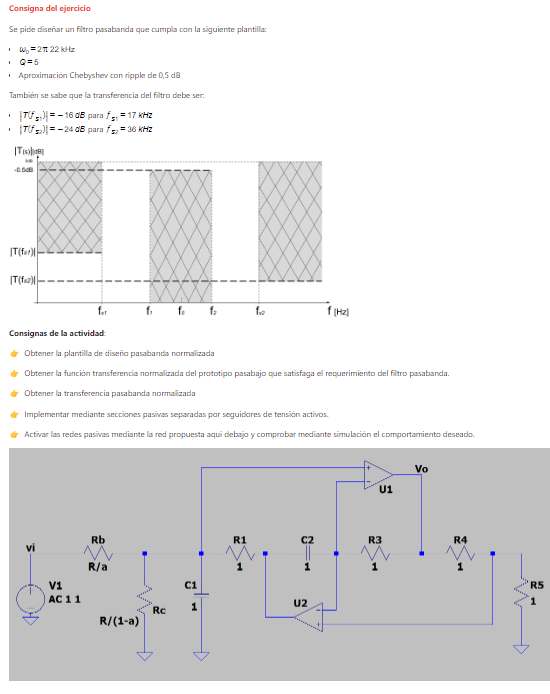

<h3> Resolucion de las consignas</h3>

Se adjunta el desarrollo hecho a mano:

<object data="Desarrollo.pdf" type="application/pdf" width="100%" height="800px">
  <p>El archivo PDF no se puede mostrar. <a href="Desarrollo.pdf">Haz clic aquí para descargarlo.</a></p>
</object>


<h2>Simulacion Python</h2>

In [2]:
import numpy as np
from scipy import signal as signal
from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq,tfcascade,pretty_print_lti


#parametros del filtro a diseñar

fp1 = 19.90972 * 10**3
fp2 = 24.30952 * 10**3
fs1 = 17 * 10**3
fs2 = 36 * 10**3

Calculo los parametros de la plantilla Low pass 

In [66]:
#calculo norma de frecuencia y la aplico a los valores del filtro
norma_w = np.sqrt(fp1*fp2)

wp1_n = fp1 / norma_w 
wp2_n = fp2 / norma_w
ws1_n = fs1 / norma_w
ws2_n = fs2 / norma_w

print(f"Wp1_n={wp1_n};Wp2_n={wp2_n}")
print(f"Ws1_n={ws1_n};Ws2_n={ws2_n}")
BW = wp2_n - wp1_n
Q = 1/BW

# valores de omega con nucleo de transformacion (para plantilla de pasa bajos)
omega_s1=  Q * (ws1_n**2 - 1)/ws1_n
omega_s2=  Q * (ws2_n**2 - 1)/ws2_n
omega_p1=  Q * (wp1_n**2 - 1)/wp1_n
omega_p2=  Q * (wp2_n**2 - 1)/wp2_n

# elijo los valores mas exigentes para el filtro (valor mas chico en modulo)

omega_s = np.abs( omega_s1)
omega_p = omega_p2

#obtengo los valores de epsilon y n del filtro pasabajos

alpha_max = 0.5
alpha_min = 16

epsilon = np.sqrt((10**(alpha_max/10)) - 1) 
print("Calculo del N del filtro:")

for n in range(1,5): # veo que numero de N se necesita para la plantilla del PB
    alpha_min_c = 10 * np.log10(1+ epsilon**2 * np.cosh(n * np.arccosh(omega_s))**2 )
    print(f"alpha_min={alpha_min_c} para un n={n}")
    if alpha_min < alpha_min_c:
       alpha_min = alpha_min_c 
       n=3
       break
    n=0
print(f"Filtro de orden N={n} con un epsilon={epsilon}")

Wp1_n=0.9049912586855338;Wp2_n=1.1049830486235446
Ws1_n=0.7727306761548668;Ws2_n=1.6363708436220707
Calculo del N del filtro:
alpha_min=2.6228510302891723 para un n=1
alpha_min=13.085696819329051 para un n=2
alpha_min=26.86737148112998 para un n=3
Filtro de orden N=3 con un epsilon=0.34931140018894796


Con los valores obtenidos previamente se calcula la transferencia modulo cuadrado low pass de un chebby, y con la transferencia obtenida se obtienen sus raices para obtener la transferencia del sistema

In [14]:

# Obtengo raices de la transferencia pasa bajos al cuadrado

roots = np.roots([-1, 0,-1.5,0,-0.5625,0,0.5122])

print(f"Raices Transferencia pasa bajos modulo cuadrado: {roots}")

# De estas raices debo tomar aquellas que esten en el semiplano izquierdo (parte real negativa)
# Con esto construyo transferencia pasa bajos

denominador = np.poly([-0.31322505+1.02192456j,-0.31322505-1.02192456j,-0.62645011])
numerador = [0.7157]

print(f"\n\nTransferencia obtenida:")
pretty_print_lti(numerador,denominador)

# Aplico el nucleo de transformacion a la transferencia previa
# Finalmente obtengo los coeficientes del numerador y denominador

Raices Transferencia pasa bajos modulo cuadrado: [-0.31322505+1.02192456j -0.31322505-1.02192456j  0.31322505+1.02192456j
  0.31322505-1.02192456j -0.62645011+0.j          0.62645011+0.j        ]


Transferencia obtenida:


<IPython.core.display.Math object>

A continuacion compruebo que este valor de transferencia obtenido coincide con el esperado utilizando las funciones incorporadas en numpy.

In [13]:
atenuacion_deseada = 0.5  # Atenuación deseada en la banda de paso (en decibeles)
wp = 1 # Frecuencia de corte del filtro (en hertz)
N = 3

numerador, denominador = signal.cheby1(N, atenuacion_deseada, wp, btype='low', analog=True, output='ba')
pretty_print_lti(numerador,denominador)

<IPython.core.display.Math object>

Aplico nucleo de transformacion y con ello obtengo una transferencia que sera el filtro pasa bandas de orden 3 tipo chebby

In [15]:
# coeficientes calculados en forma algebraica a partir del nucleo de transformacion:

numerador = [0.0057248,0,0,0]
denominador = [1,0.25058,3.061,0.5068,3.061,0.25058,1]

pretty_print_lti(numerador,denominador)


<IPython.core.display.Math object>

Para comprobar si el paso anterior es correcto podemos calcular nuevamente el filtro mediante funciones integradas en numpy y comprobar si los coeficientes coinciden


In [23]:
atenuacion_banda_paso = 0.5  # Atenuación deseada en la banda de paso (en decibeles)
rizo_bp = 1 # Frecuencia de corte del filtro (en hertz)
order = 3
wp= [0.9049912586855338,1.1049830486235446]

numerador, denominador = signal.cheby1(order,atenuacion_banda_paso,wp, btype='band', analog=True, output='ba')
pretty_print_lti(numerador,denominador)

<IPython.core.display.Math object>

Una vez obtenida la transferencia podemos graficar la respuesta del filtro:

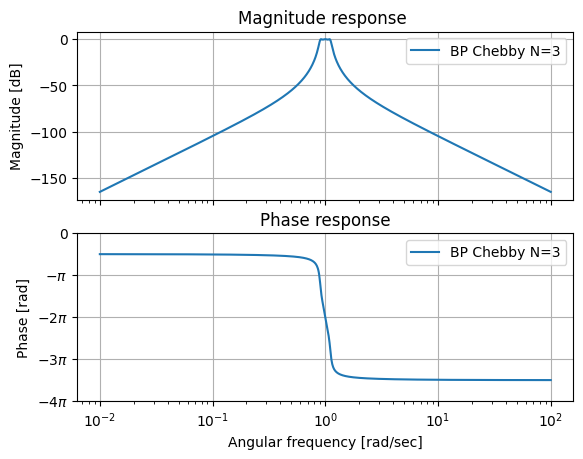

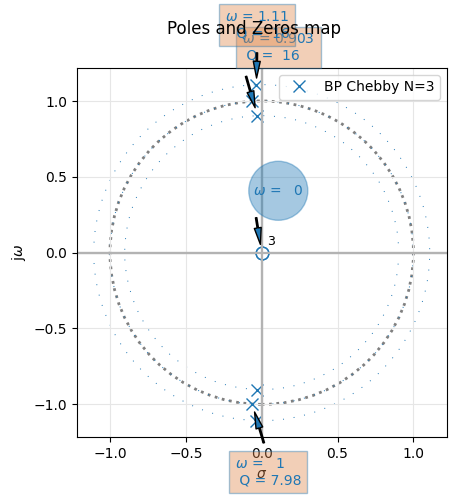

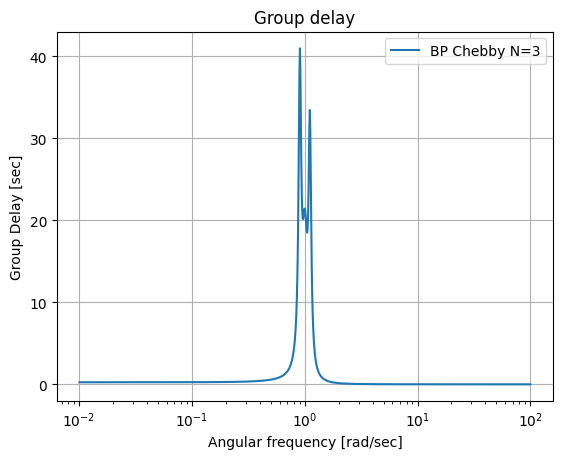

In [24]:
num = np.array(numerador)
den = np.array(denominador)
H1 = signal.TransferFunction( num, den )

analyze_sys(H1,"BP Chebby N=3",same_figs=False)


Para poder implementar el circuito es necesario obtener la transferencia en varios polinomios de primer o segundo orden, para ello calculamos las raices de la transferencia obtenida y con esos polos obtenemos las diferentes transferencias.


In [26]:
roots_pb = np.roots(denominador)
print(f"Las raices son: {roots_pb}")

Las raices son: [-0.03450719+1.1069132j  -0.03450719-1.1069132j  -0.06264308+0.99803599j
 -0.06264308-0.99803599j -0.02813589+0.90253609j -0.02813589-0.90253609j]


In [60]:
# Obtenemos 3 transferencia de segundo orden:
from IPython.display import display, Math

den1= np.poly([-0.03450719+1.1069132j , -0.03450719-1.1069132j])
num1= [0.06901,0]
den2= np.poly([-0.06264308+0.99803599j , -0.06264308-0.99803599j])
num2= [0.1253,0]
den3= np.poly([ -0.02813589+0.90253609j, -0.02813589-0.90253609j])
num3= [0.05627,0]
print("Transferencia 1:")
pretty_print_lti(num1,den1)
print("Transferencia 2:")
pretty_print_lti(num2,den2)
print("Transferencia 3:")
pretty_print_lti(num3,den3)
k = 0.005725/(0.05627 *0.1253*0.06901)
print(f"K= {k}")

Transferencia 1:


<IPython.core.display.Math object>

Transferencia 2:


<IPython.core.display.Math object>

Transferencia 3:


<IPython.core.display.Math object>

K= 11.766179715051663


A continuacion se muestan las 3 transferencias analizadas:

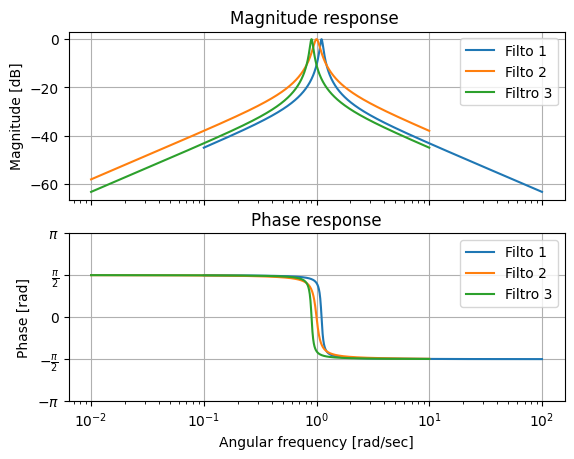

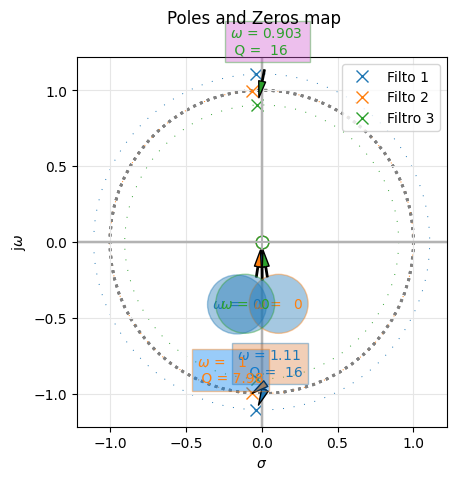

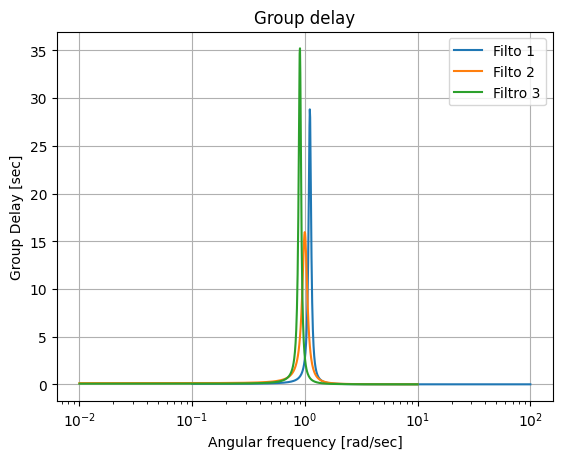

In [65]:

H2 = signal.TransferFunction( num1, den1 )
H3 = signal.TransferFunction( num2, den2 )
H4 = signal.TransferFunction( num3, den3 )
H = [H2,H3,H4]
analyze_sys(H,["Filto 1","Filto 2","Filtro 3"],same_figs=True)

A continuacion se muestran los valores obtenidos del filtro para cada uno de los paremetros calculados.

Transferencia en banda de paso:

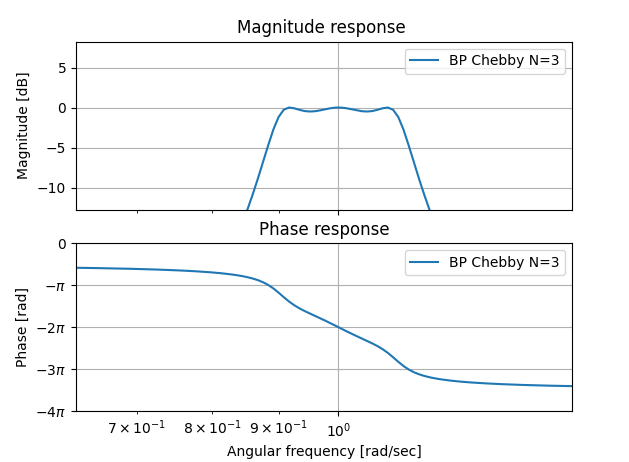

En esta imagen se observan las oscilaciones debido a que el filtro es de tipo Chebyshef

Se observa que la atenuacion maxima en esta banda es de 0.5db

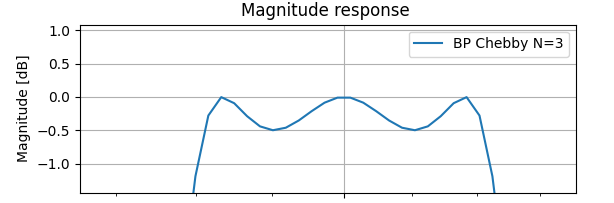

A continuacion se muestran las frecuencias de corte (Wp1 y Wp2).
Recordando que: Wp1_n=0.904 ; Wp2_n=1.1049 Y que la atenuacion maxima era de 0.5db

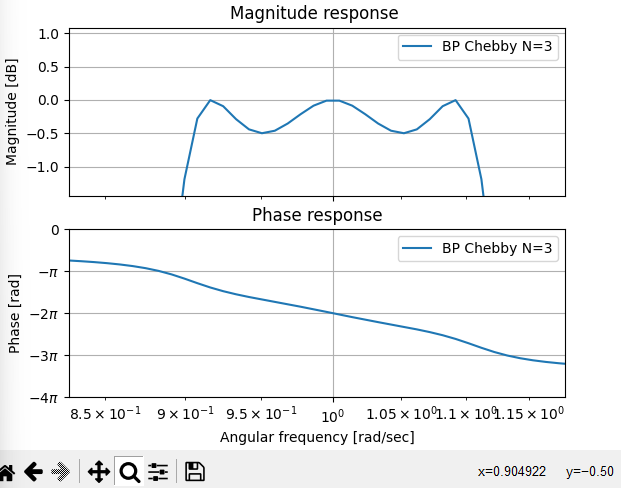

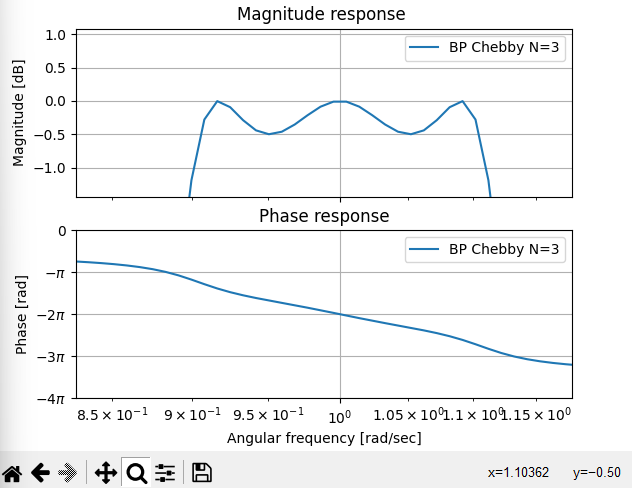

Ahora se analizan los punto de Ws1 y Ws2.
Recordando que: Ws1_n=0.772 ; Ws2_n=1.636 Y que la atenuacion minima era de -16dB y -24dB respectivamente.
NOTA: tener en cuenta que debido a que el orden que se tomo es N=3, la atenuacion en las bandas de stop sera aun mayor, siendo este el filtro mas eficiente para cumplir con la plantilla.
Recordemos que:
 * alpha_min=26.86737148112998 para un n=3

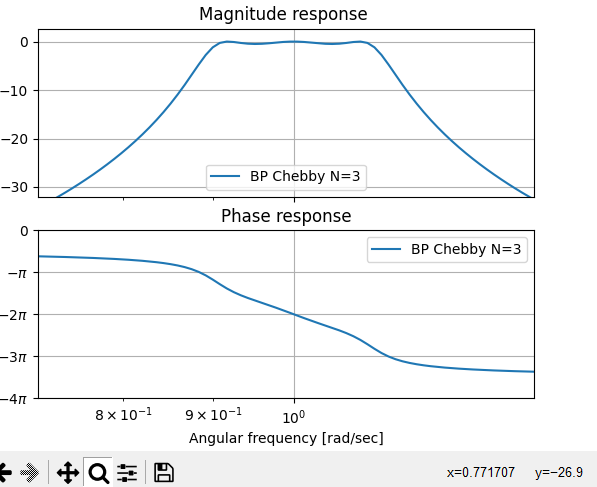

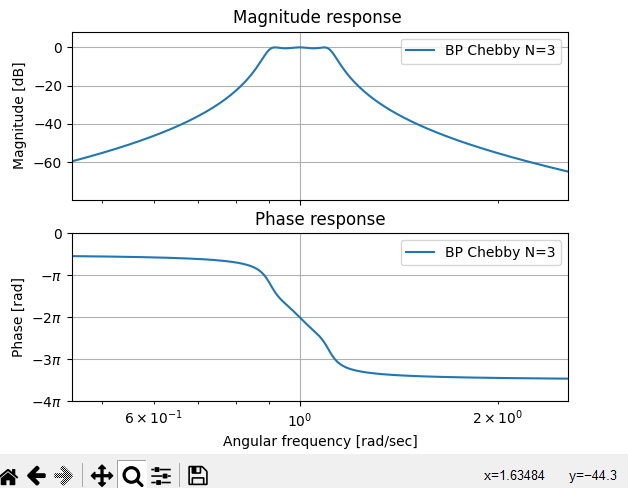

Al ser el filtro no simetrico vemos como la las atenuaciones para cada frecuencia especificada seran distintas. Sin embargo ambas cumplen con el reuquisito minimo del filtro


<h2>Simulacion LT-SPICE</h2>

Circuito:

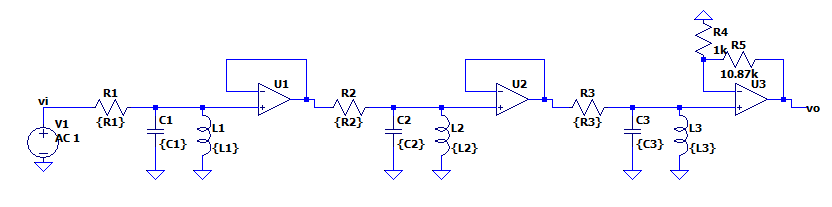

Comandos:
(Simulacion normalizada)
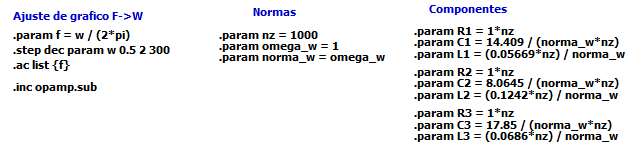

La respuesta en frecuencia del filtro normalizado es la siguiente:

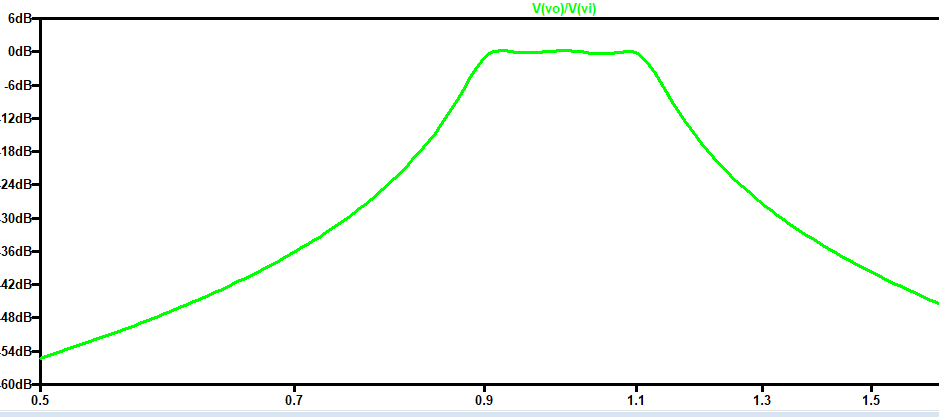

Si analizamos las frecuencias de corte y de stop obtenemos que:

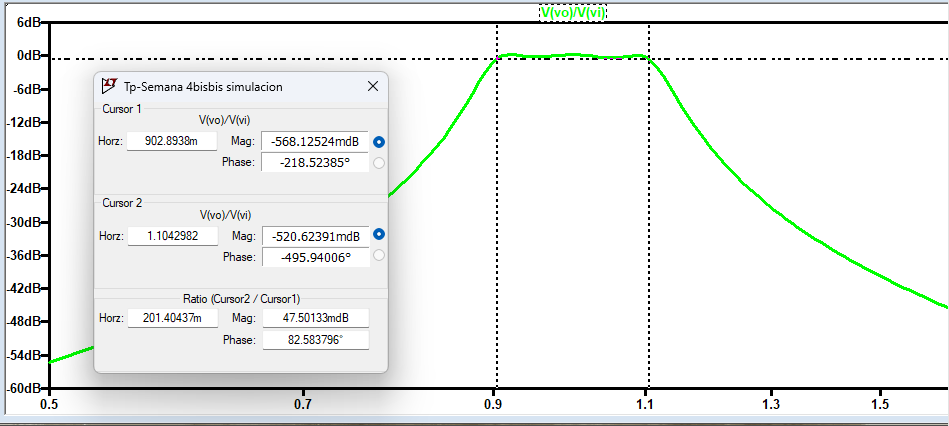

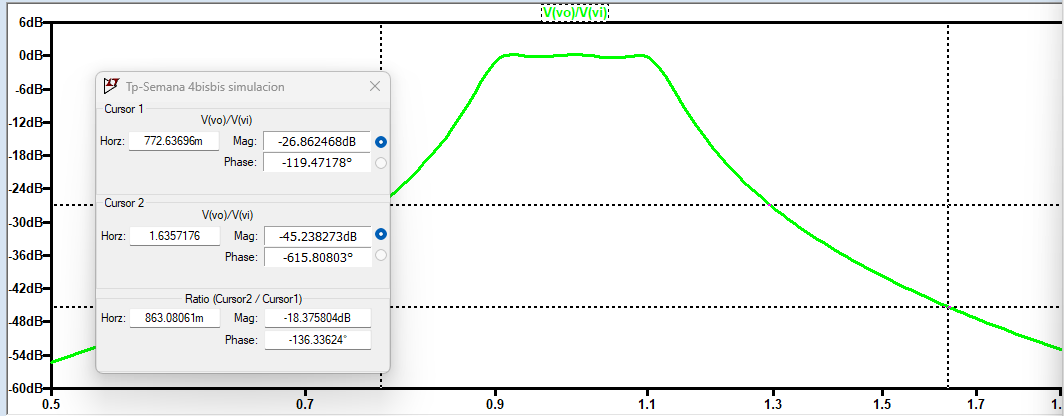

Finalmente desnormalizando se obtiene:

(comandos)

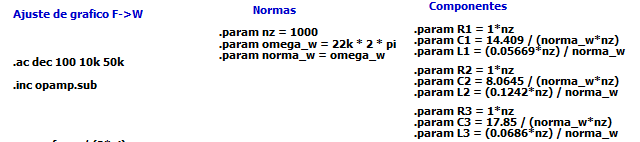

Grafica:

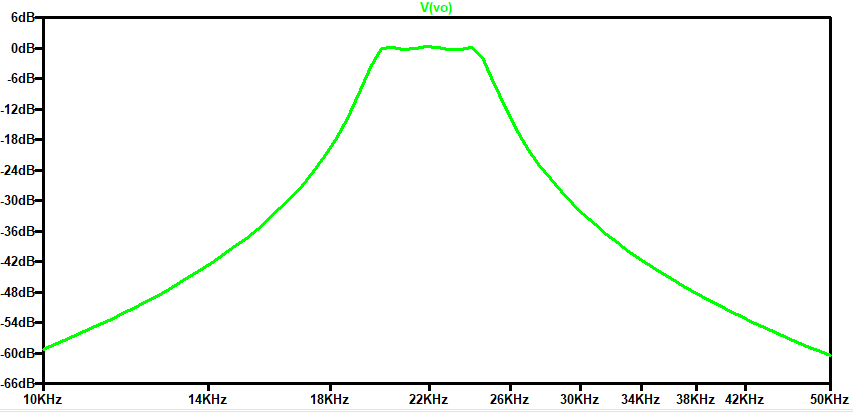

Si analizamos las frecuencias de corte y de stop obtenemos que:

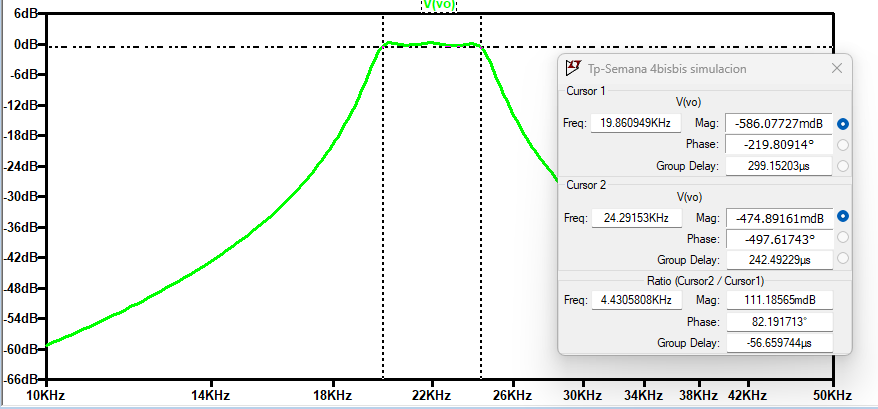

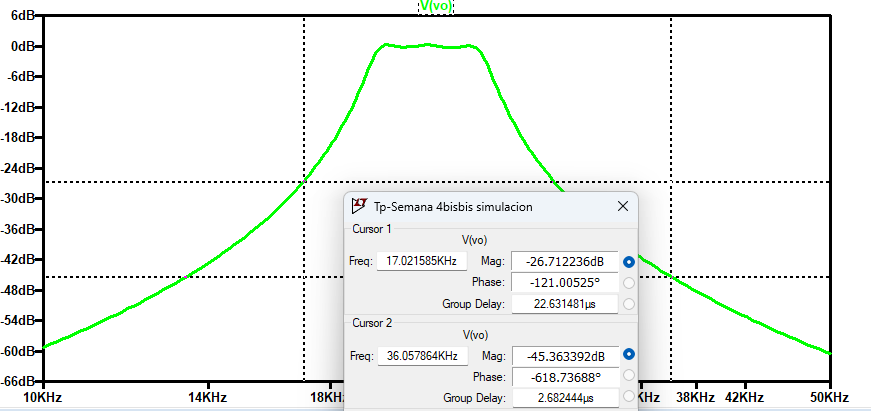

Como se pudo observar en las simulaciones en LT-Spice se pudo cumplir con las condiciones de la plantilla propuesta.
Debido a que la implementacion fue hecha con un filtro de orden 3, se obtuvo un filtro con mejores caracteristicas de las pedidas como puede ser la atenuacion minima en la banda de parada.


<h1>Conclusiones</h1>